# Data Exploration
This is a file that explores the annotations to see how we should handle missing values, bad data, etc.

## Import the annotations JSON file

In [1]:
import json

json_file = open('../data/annotations/StanfordExtra_v12.json')

annotation_data = json.load(json_file)

print(f"JSON Data Size {len(annotation_data)}")

json_formatted_str = json.dumps(annotation_data[0], indent=4)

print(json_formatted_str)

JSON Data Size 12538
{
    "img_path": "n02085782-Japanese_spaniel/n02085782_2886.jpg",
    "img_width": 350,
    "img_height": 272,
    "img_bbox": [
        205,
        20,
        116,
        201
    ],
    "is_multiple_dogs": false,
    "joints": [
        [
            108.66666666666667,
            252.0,
            1
        ],
        [
            147.66666666666666,
            229.0,
            1
        ],
        [
            163.5,
            208.5,
            1
        ],
        [
            0,
            0,
            0
        ],
        [
            0,
            0,
            0
        ],
        [
            0,
            0,
            0
        ],
        [
            54.0,
            244.0,
            1
        ],
        [
            77.33333333333333,
            225.33333333333334,
            1
        ],
        [
            79.0,
            196.5,
            1
        ],
        [
            0,
            0,
            0
        ]

# Check Image Existence

In [2]:
from PIL import Image
from IPython.display import display
import pandas as pd


images_information = pd.DataFrame()

for index, annotation in enumerate(annotation_data):
    image_info = {}
    img_path = annotation['img_path']

    try:
        img = Image.open(f"../data/Images/{img_path}")
        image_info['is_valid_img'] = True
    except:
         image_info['is_valid_img'] = False

    image_info['does_img_height_match'] = annotation['img_height'] == img.height
    image_info['does_img_width_match'] = annotation['img_width'] == img.width

    image_info['img_width'] = img.width
    image_info['img_height'] = img.height

    images_information = pd.concat([images_information, pd.DataFrame([image_info])], ignore_index=True)


# Plot Valid Image Histogram

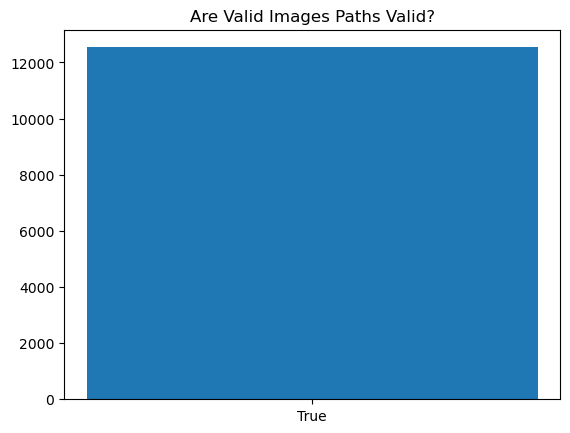

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

valid_image_counts = images_information['is_valid_img'].value_counts()
np.array(valid_image_counts.keys()).astype(str)

fig, ax = plt.subplots()
# create histogram
ax.bar(np.array(valid_image_counts.keys()).astype(str), np.array(valid_image_counts.values))


ax.set_title('Are Valid Images Paths Valid?')
 
# display histogram
plt.show()


# Image Heights Match

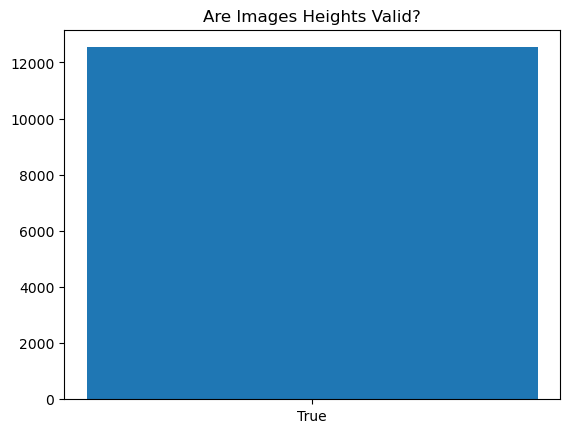

In [4]:
valid_image_heights = images_information['does_img_height_match'].value_counts()
np.array(valid_image_heights.keys()).astype(str)

fig, ax = plt.subplots()

# create histogram
ax.bar(np.array(valid_image_heights.keys()).astype(str), np.array(valid_image_heights.values))

ax.set_title('Are Images Heights Valid?')
 
# display histogram
plt.show()

# Image Widths Match

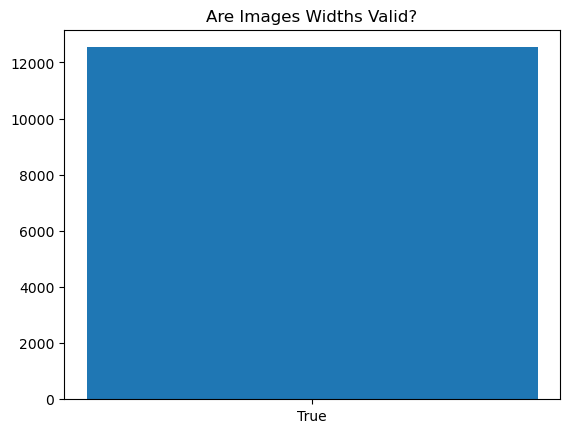

In [5]:
valid_image_widths = images_information['does_img_width_match'].value_counts()
np.array(valid_image_widths.keys()).astype(str)

fig, ax = plt.subplots()

# create histogram
ax.bar(np.array(valid_image_widths.keys()).astype(str), np.array(valid_image_widths.values))

ax.set_title('Are Images Widths Valid?')
 
# display histogram
plt.show()

# Import Data Sets

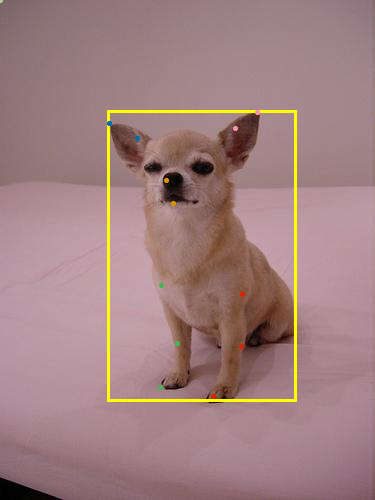

In [6]:
import sys; sys.path.insert(0, '..')
from src.keypoints import get_keypoint_definitions
from src.image import add_bbox_and_keypoints
from torch.utils.data import DataLoader
import torchvision
from PIL import Image

from src.dog_data_set import DogPoseDataSet

dog_pose_train_data_set = DogPoseDataSet(
    images_dir = "../data/Images/", 
    np_split_file="../data/annotations/train_stanford_StanfordExtra_v12.npy", 
    annotations_json_file="../data/annotations/StanfordExtra_v12.json")

# dog_pose_test_data_set = DogPoseDataSet(
#     images_dir = "../data/Images/", 
#     np_split_file="../data/annotations/test_stanford_StanfordExtra_v12.npy", 
#     annotations_json_file="../data/annotations/StanfordExtra_v12.json")

# dog_pose_validation_data_set = DogPoseDataSet(
#     images_dir = "../data/Images/", 
#     np_split_file="../data/annotations/val_stanford_StanfordExtra_v12.npy", 
#     annotations_json_file="../data/annotations/StanfordExtra_v12.json")

from csv import DictReader
from PIL import ImageColor


keypoint_defs = get_keypoint_definitions('../data/annotations/keypoint_definitions.csv')

keypoint_colors = keypoint_defs['colors']


first_sample = None

for i, sample in enumerate(dog_pose_train_data_set):
    first_sample = sample
    if (i == 50):
        break

sample_image_with_bbox = add_bbox_and_keypoints(first_sample['image'], first_sample['img_bbox'], first_sample['joints'], keypoint_colors)

display(torchvision.transforms.functional.to_pil_image(sample_image_with_bbox))

# Resize Images

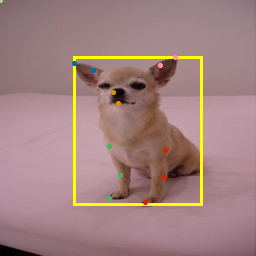

In [7]:
from src.rescale import Rescale
from torchvision import transforms

composed_transforms = transforms.Compose([Rescale(256)])

dog_pose_train_data_set_resized = DogPoseDataSet(
    images_dir = "../data/Images/", 
    np_split_file="../data/annotations/train_stanford_StanfordExtra_v12.npy", 
    annotations_json_file="../data/annotations/StanfordExtra_v12.json",
    transform=composed_transforms)

resized_sample = None

for i, sample in enumerate(dog_pose_train_data_set_resized):
    resized_sample = sample
    if (i == 50):
        break

image_with_bbox = add_bbox_and_keypoints(resized_sample['image'], resized_sample['img_bbox'], resized_sample['joints'], keypoint_colors)

display(torchvision.transforms.functional.to_pil_image(image_with_bbox))